# Experiment 01

This shows the bots playing Tetris over 2273 rounds (which took about 2 days, so I'll look into optimising the code).

The mean is trending very slowly upwards, so the bots are getting gradually better at playing Tetris.

## The current topology

100 inputs, 1 hidden layer with 16 units, 7 output classes

The current network architecture with a single hidden layer might be sufficient for learning basic Tetris strategies, especially given the fitness function's incentives for survival and making moves. However, it's likely that a more complex network with additional hidden layers could capture more nuanced patterns and lead to better performance.

- Limited Feature Extraction: With only one hidden layer, the network's capacity to extract meaningful features from the input grid is limited. More hidden layers would allow the network to learn hierarchical representations of the game state, identifying complex patterns like potential line clears, threats of holes, or opportunities for T-spin setups.

- Non-Linearity: Tetris involves complex decision-making that often requires non-linear relationships between the input grid and the optimal move. Deeper networks with multiple non-linear activation functions (like ReLU) can better model these intricate relationships.

## Things to try

- Increase Hidden Layers: Experiment with adding one or two more hidden layers with varying numbers of units.
- Vary Activation Functions: Try different activation functions like sigmoid, tanh, or LeakyReLU in addition to ReLU.
- Consider Convolutional Layers: Convolutional layers can be effective at extracting spatial features from the grid, potentially improving the network's understanding of piece shapes and board configurations.
- Explore Recurrent Layers: If we observe that the bot struggles with long-term planning, consider adding recurrent layers to explicitly model temporal dependencies.


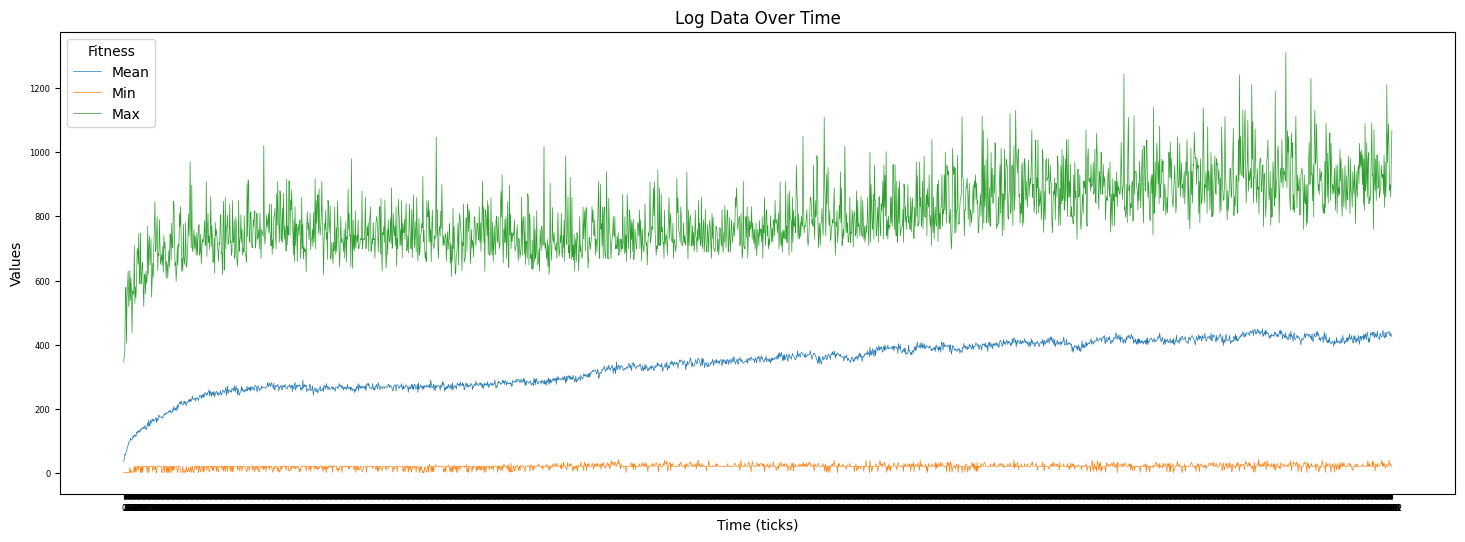

In [9]:
import matplotlib.pyplot as plt
import re

log_file_path = 'log.txt'

# Extract mean, min, and max from each log entry
means = []
mins = []
maxs = []

with open(log_file_path, 'r') as file:
    for entry in file:
        
        # block with re: 3.9s
        match = re.search(r'mean=(\d+\.\d+), min=(\d+\.\d+), max=(\d+\.\d+)', entry)
        if match:
            mean = float(match.group(1))
            min_val = float(match.group(2))
            max_val = float(match.group(3))
            means.append(mean)
            mins.append(min_val)
            maxs.append(max_val)

# Create the timeline (x-axis)
ticks = list(range(len(means)))

# Plot the data
plt.figure(figsize=(18, 6))
plt.plot(ticks, means, label='Mean', linewidth=0.5)  # Thin line
plt.plot(ticks, mins, label='Min', linewidth=0.5)    # Thin line
plt.plot(ticks, maxs, label='Max', linewidth=0.5)    # Thin line

# Customize the graph
plt.xticks(ticks, fontsize=6)  # Small ticks
plt.yticks(fontsize=6)         # Small ticks
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Thin grid lines
plt.legend(title="Fitness")
plt.xlabel('Time (ticks)')
plt.ylabel('Values')
plt.title('Log Data Over Time')

# Show the plot
plt.show()
